In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

In [2]:
df = pd.read_csv('cleaned_house_data.csv')
df.head()

,City,Bathroom,Balcony,BHK,Area (Sqft),Floor Ratio,New Property,Resale,Furnished,Semi-Furnished,...,Age Less than 5 Years,Age 5 to 10 Years,Age 15 to 20 Years,New Construction,Age above 20 Years,Main Road,Garden/Park,Pool,Parking Spaces,Amount (Lac)
0,Agra,2,2,2,1250,0.08,0,1,1,1,...,0,0,0,1,0,0,0,0,1,42
1,Agra,2,1,3,1500,0.25,0,1,0,0,...,0,1,0,0,0,1,1,0,1,49
2,Agra,2,2,2,1210,0.67,0,1,1,0,...,1,0,0,0,0,0,0,0,1,50
3,Agra,1,2,2,862,0.09,0,1,1,1,...,0,0,0,1,0,1,1,1,1,42
4,Agra,2,1,2,1212,0.40,0,1,0,0,...,1,0,0,0,0,0,0,0,1,42


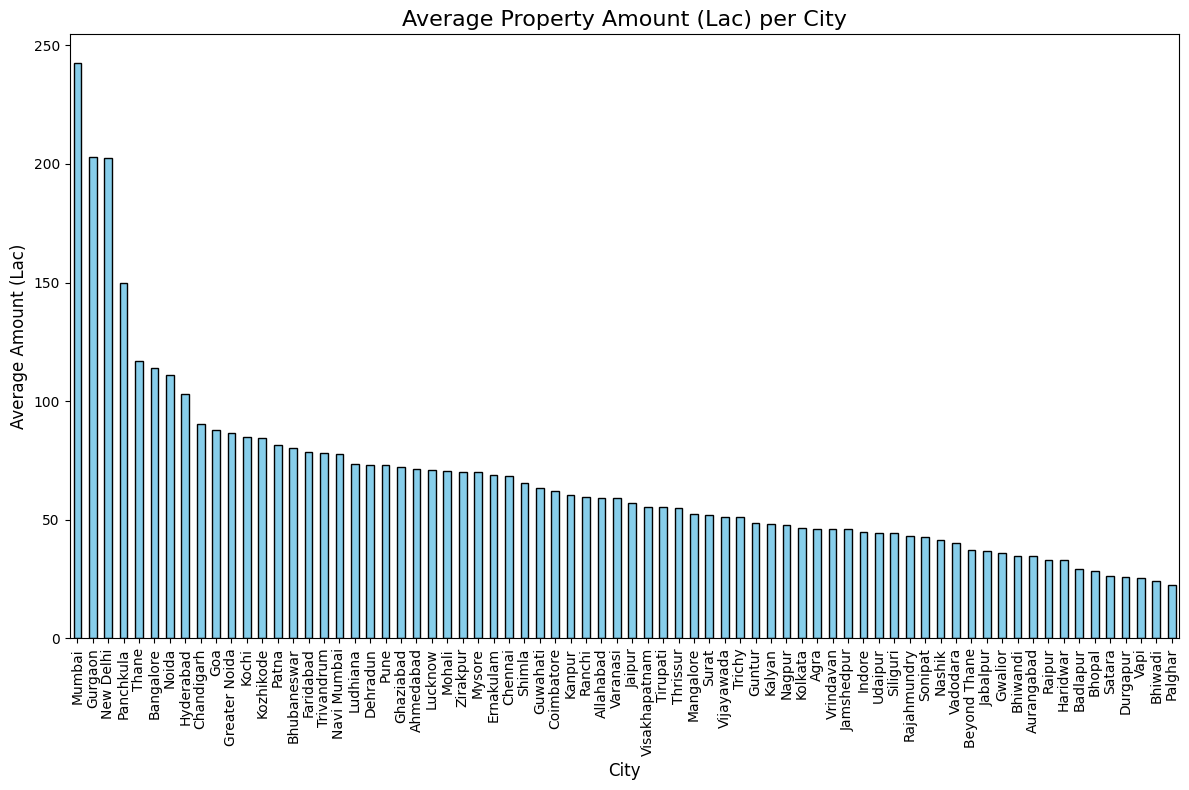

In [124]:
# Calculate average amount per city
city_avg_amount = df.groupby("City")["Amount (Lac)"].mean().sort_values(ascending=False)

# Plotting the average amount per city
plt.figure(figsize=(12, 8))
city_avg_amount.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Property Amount (Lac) per City", fontsize=16)
plt.ylabel("Average Amount (Lac)", fontsize=12)
plt.xlabel("City", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




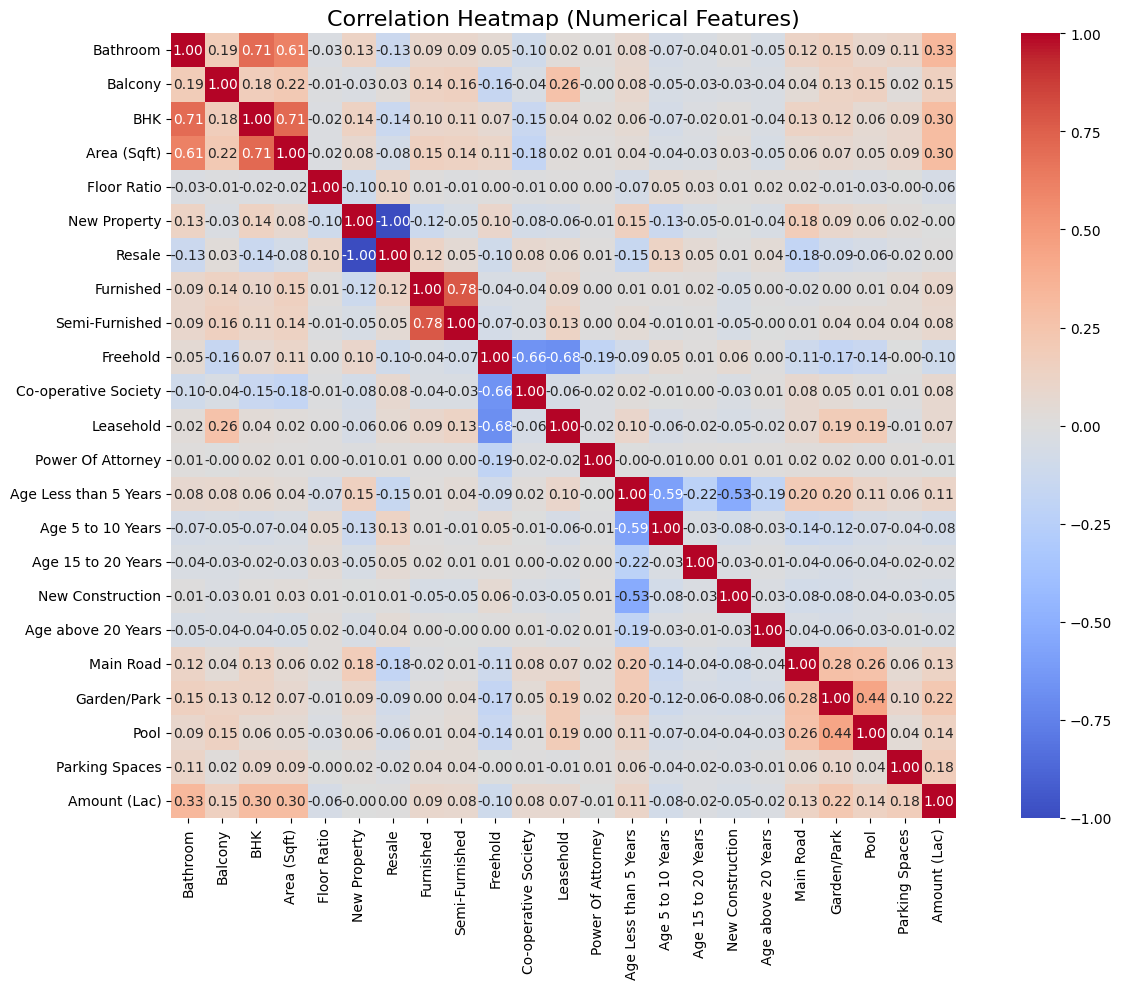

In [3]:
# heatmap for correlation matrix
# Select only numerical columns for correlation calculation
numerical_data = df.select_dtypes(include=["float64", "int64"])

# Recalculate correlations and plot the heatmap
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap (Numerical Features)", fontsize=16)
plt.tight_layout()
plt.show()


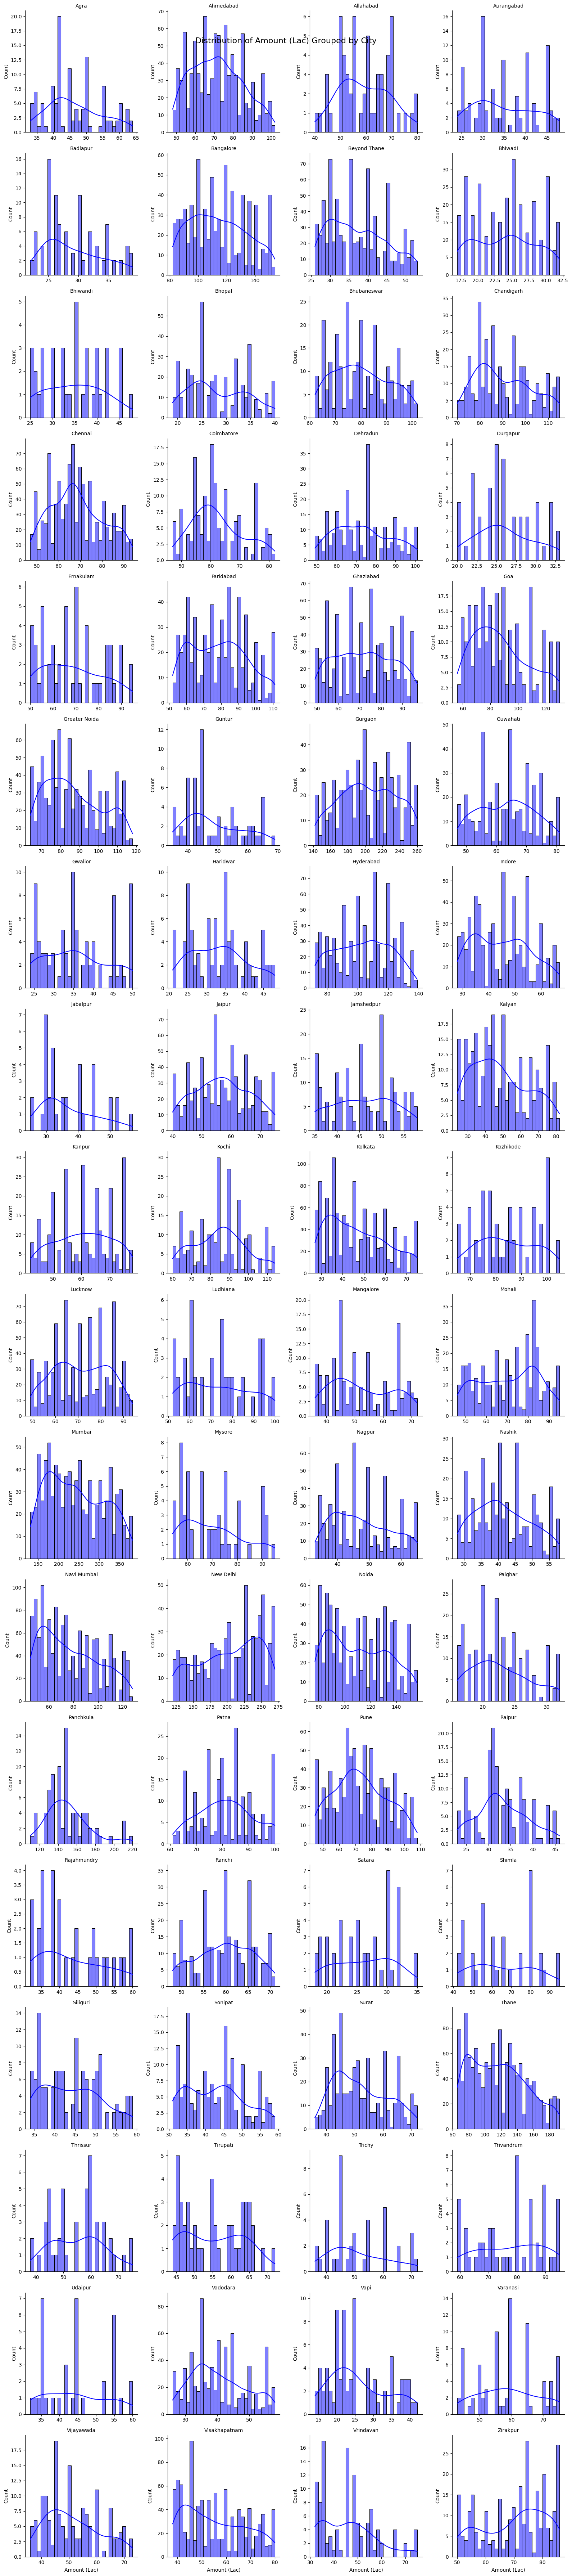

In [4]:
# distribution of amount of each city
# Set up the grid for city-wise distribution plots
g = sns.FacetGrid(df, col="City", col_wrap=4, height=4, sharex=False, sharey=False)

# Plot the distribution of Amount (Lac) for each city
g.map(sns.histplot, "Amount (Lac)", kde=True, bins=30, color="blue")

# Set titles and layout
g.set_titles("{col_name}")
g.fig.suptitle("Distribution of Amount (Lac) Grouped by City", fontsize=16)
plt.tight_layout()
plt.show()








In [5]:
# Pearsonr result

# Initialize an empty DataFrame to store the correlation results
corr_df = pd.DataFrame(columns=['r', 'p'])

# Iterate through the 2nd to 4th columns of df (index 1 to 3)
for col in df.columns[1:5]:  # This selects the columns from index 1 to 3 (2nd to 4th columns)
   
    r, p = stats.pearsonr(df['Amount (Lac)'], df[col])
    corr_df.loc[col] = [round(r, 5), p]

# Display the results
print(corr_df)


                   r              p
Bathroom     0.33075   0.000000e+00
Balcony      0.15275  1.763498e-137
BHK          0.30441   0.000000e+00
Area (Sqft)  0.29729   0.000000e+00


In [6]:
# One way anova
# Group data by city and check group sizes
city_groups = df.groupby("City")["Amount (Lac)"]
group_sizes = city_groups.size()

# Number of groups (cities)
k = len(group_sizes)

# Total number of observations
N = len(df['City'])

# Degrees of freedom
df1 = k - 1  # Numerator degrees of freedom
df2 = N - k  # Denominator degrees of freedom

# Perform one-way ANOVA
anova_result = f_oneway(*(group["Amount (Lac)"].values for _, group in df.groupby("City")))

f = anova_result.statistic
p = 1 - stats.f.cdf(f, df1, df2)

# Results
print(f"F-statistic: {f}")
print(f"Degrees of freedom: df1 = {df1}, df2 = {df2}")
print(f"P value: {p}" )



F-statistic: 1901.2108433528983
Degrees of freedom: df1 = 71, df2 = 26313
P value: 1.1102230246251565e-16
